In [3]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
fruit=pd.read_csv("E:\\fruit_data_with_colors.txt", sep="\t")

In [5]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
fruit.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [7]:
fruit.index

RangeIndex(start=0, stop=59, step=1)

In [8]:
fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [9]:
fruit.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [17]:
fruit.isnull().sum() # cheking the is there any missing values in the data set

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [19]:
fruit.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [10]:
fruit.fruit_name.value_counts() # here we can find most of the fruits are oranges

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [21]:
# create a mapping from fruit label value to fruit name to make results easier to interpret

In [11]:
look_fruit_name=dict(zip(fruit.fruit_label.unique(),fruit.fruit_name.unique()))
look_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [15]:
x= fruit[['height', 'width', 'mass', 'color_score']]
y= fruit["fruit_label"]

In [16]:
x_train, x_test, y_train,y_test= train_test_split(x,y, random_state=0, test_size=0.2)

In [17]:
import seaborn as sns

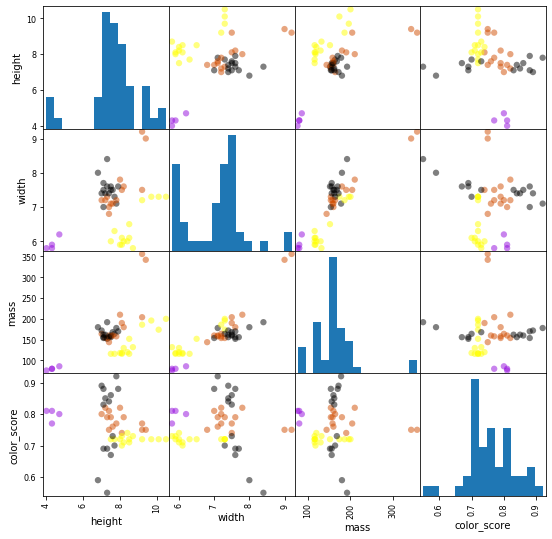

In [18]:
# plotting a scatter matrix
from matplotlib import cm

X = fruit[['height', 'width', 'mass', 'color_score']]
y = fruit['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [19]:
# we are splitting the data 
X = fruit[['height', 'width', 'mass']]
y = fruit['fruit_label']

X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.25)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
knn.score(X_train,y_train)

0.8181818181818182

In [26]:
predict= knn.predict(X_test)

In [27]:
predict

array([4, 2, 3, 4, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2], dtype=int64)

In [28]:
accuracy_score(y_test,predict) # checking the accuracy on test data and predicted values 

0.7333333333333333

In [29]:
knn.score(X_test,y_test) # we can check this way also

0.7333333333333333

In [30]:
# then we can see at which hyper parameter we can better accuracy score. 

In [33]:
k_range=range(1,20)
score= []

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))

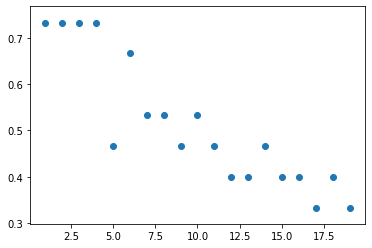

In [34]:
plt.scatter(k_range,score)

In [ ]:
# By looing at teh plot we can say accuracy is keep on decresing. Then we have to check forother 
# we can do normalisation on the data and see the accuracy 

In [35]:
X.head()

,height,width,mass
0,7.3,8.4,192
1,6.8,8.0,180
2,7.2,7.4,176
3,4.7,6.2,86
4,4.6,6.0,84


In [43]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [44]:
X[0] # look like all data points are scalled.. 

array([0.50769231, 0.68421053, 0.40559441])

In [46]:
X[1]

array([0.43076923, 0.57894737, 0.36363636])

In [47]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=10, test_size=0.2)

In [48]:
knn_scaled= KNeighborsClassifier(n_neighbors= 3)
knn_scaled.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
knn_scaled.score(X_test,y_test)

0.9166666666666666

In [51]:
knn_scaled.score(X_train,y_train)

0.9148936170212766

In [52]:
# looking like accuracy is good for the test data and train data. 